In [5]:
# Install the yfinance api
!pip install yfinance

# Import the necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the ticker symbol for Mercedes-Benz
ticker_symbol = "MBG.DE" 

# Create a Ticker object
mercedes = yf.Ticker(ticker_symbol)

Defaulting to user installation because normal site-packages is not writeable


In [6]:
# Load the data
income_statement_df = pd.read_csv("mercedes_income_statement_annual.csv", index_col=0)
balance_sheet_df = pd.read_csv("mercedes_balance_sheet_annual.csv", index_col=0)
cash_flow_df = pd.read_csv("mercedes_cash_flow_annual.csv", index_col=0)


In [7]:
# Data cleaning
income_statement_df.drop('2020-12-31',axis=1,inplace=True)
balance_sheet_df.drop('2020-12-31',axis=1,inplace=True)
cash_flow_df.drop('2020-12-31',axis=1,inplace=True)

income_statement_transposed = income_statement_df.T
balance_sheet_transposed = balance_sheet_df.T
cash_flow_transposed = cash_flow_df.T

income_statement_transposed.index = pd.to_datetime(income_statement_transposed.index)
balance_sheet_transposed.index = pd.to_datetime(balance_sheet_transposed.index)
cash_flow_transposed.index = pd.to_datetime(cash_flow_transposed.index)

income_statement_transposed = income_statement_transposed.sort_index(ascending=True)
balance_sheet_transposed = balance_sheet_transposed.sort_index(ascending=True)
cash_flow_transposed = cash_flow_transposed.sort_index(ascending=True)

income_statement_transposed.fillna(0, inplace=True)
balance_sheet_transposed.fillna(0, inplace=True)
cash_flow_transposed.fillna(0, inplace=True)


In [8]:
# Displaying the columns chosen for further analysis
selected_income = income_statement_transposed[['Gross Profit', 'Net Income', 'Total Revenue','EBIT','Operating Income','Tax Rate For Calcs']]
selected_balance = balance_sheet_transposed[['Current Assets', 'Current Liabilities', 'Total Debt', 'Stockholders Equity', 'Total Assets','Invested Capital','Total Equity Gross Minority Interest']]
selected_cashflow = cash_flow_transposed[['Operating Cash Flow','Investing Cash Flow','Financing Cash Flow']]

# Merge the selected financial data into one DataFrame based on the date index
financial_data = pd.merge(selected_income, selected_balance, left_index=True, right_index=True)
financial_data = pd.merge(financial_data, selected_cashflow, left_index=True, right_index=True)

# Initialize a DataFrame to store ratios
df = pd.DataFrame(index=financial_data.index)

In [9]:
# 1. Gross Profit Margin
# Handle potential division by zero by setting to NaN or 0 if denominator is 0
df['Gross Profit Margin'] = (financial_data['Gross Profit'] / financial_data['Total Revenue']).replace([float('inf'), -float('inf')], pd.NA)

# 2. Net Profit Margin
df['Net Profit Margin'] = (financial_data['Net Income'] / financial_data['Total Revenue']).replace([float('inf'), -float('inf')], pd.NA)

# 3. Current Ratio
df['Current Ratio'] = (financial_data['Current Assets'] / financial_data['Current Liabilities']).replace([float('inf'), -float('inf')], pd.NA)

# 4. Debt-to-Equity Ratio
# Check for zero Stockholders Equity to avoid division by zero
df['Debt-to-Equity Ratio'] = (financial_data['Total Debt'] / financial_data['Stockholders Equity']).replace([float('inf'), -float('inf')], pd.NA)

# 5. Asset Turnover Ratio
df['Asset Turnover Ratio'] = (financial_data['Total Revenue'] / financial_data['Total Assets']).replace([float('inf'), -float('inf')], pd.NA)

# 6. Return on Equity (ROE)
df['Return on Equity (ROE)'] = (financial_data['Net Income'] / financial_data['Stockholders Equity']).replace([float('inf'), -float('inf')], pd.NA)

# 7. Return on Assets (ROA)
df['Return on Assets (ROA)'] = (financial_data['Net Income'] / financial_data['Total Assets']).replace([float('inf'), -float('inf')], pd.NA)

# 8. Return on Invested Capital (ROIC)
NOPAT = financial_data['Operating Income'] * (1 - (financial_data['Tax Rate For Calcs'] / 100))
df['Return on Invested Capital (ROIC)'] = (NOPAT / financial_data['Invested Capital']).replace([float('inf'), -float('inf')], pd.NA)

In [10]:
df['Gross Profit Margin'] = df['Gross Profit Margin'] * 100
df['Net Profit Margin'] = df['Net Profit Margin'] * 100
df['Return on Equity (ROE)'] = df['Return on Equity (ROE)'] * 100
df['Return on Assets (ROA)'] = df['Return on Assets (ROA)'] * 100
df['Return on Invested Capital (ROIC)'] = df['Return on Invested Capital (ROIC)'] * 100

### **📊6. Visualizing Financial Trends and Growth Metrics**

Visualizing trends in financial ratios and growth metrics provides valuable context for identifying patterns over time and effectively communicating insights. To achieve this, `matplotlib.pyplot` was used for plotting, while `seaborn` enhanced the aesthetics, resulting in clean and visually appealing charts.

This brings us to the following questions:  
- How have the company’s profitability ratios evolved over the years?  
- Are there any signs of improving or declining liquidity, solvency, and efficiency?  
- Do key return metrics (ROA, ROE, ROIC) indicate strong shareholder returns? 
- What are the primary sources and uses of cash for the company each year?   
- How is the company’s capital structure split between debt and equity?  
- Is the company’s profit growth keeping pace with its revenue growth?



##### ✅ Key Visualizations

- 📈 **Combined Line Chart:**  
  Comparing **Gross Profit Margin** and **Net Profit Margin** to observe shifts in profitability.

- 📉 **Combined Line Chart:**  
  Tracking **Liquidity (Current Ratio)**, **Solvency (Debt-to-Equity)**, and **Efficiency (Asset Turnover)** ratios together for a holistic view of financial stability.

- 🔁 **Combined Line Chart:**  
  Comparing **ROA, ROE, and ROIC** to analyze returns across various perspectives.

- 💵 **Stacked Bar Chart:**  
  Showing the breakdown of **Operating**, **Investing**, and **Financing Cash Flows** over time.

- 🏛️ **100% Stacked Bar Chart:**  
  Visualizing the proportion of **Debt** and **Equity** in the company’s capital structure over the years.

- 📊 **Grouped Bar Chart:**  
  Comparing **Revenue Growth Rate** and **Net Income Growth Rate (YoY)** to highlight trends in topline and bottom-line growth.


In the original dataset, the year values were stored as full dates (e.g., 2021-12-31), and Matplotlib was automatically interpreting these as 2022 due to its default date formatting. To avoid incorrect x-axis labels and ensure clarity, I created a custom list of years (2021, 2022, 2023, 2024) and used it directly for the x-axis.

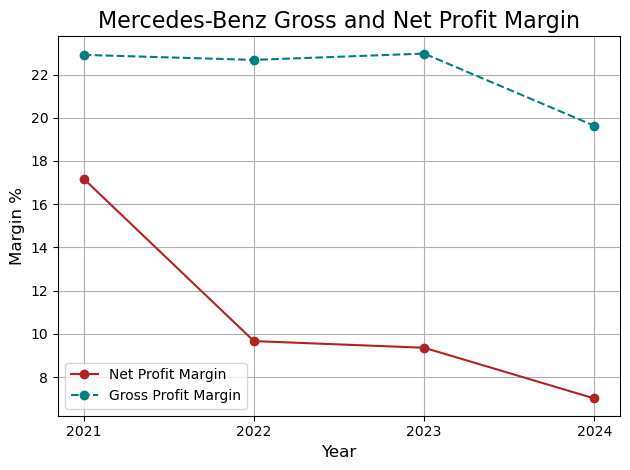

In [11]:
# Create a list of years manually
years = ['2021', '2022', '2023', '2024']

# Plot Net Profit Margin as a solid line with circle markers
plt.plot(years, df['Net Profit Margin'], marker='o', linestyle='-', color='firebrick', label='Net Profit Margin')
# Plot Gross Profit Margin as a dashed line with circle markers
plt.plot(years, df['Gross Profit Margin'], marker='o', linestyle='--', color='teal', label='Gross Profit Margin')

# Add title and labels
plt.title('Mercedes-Benz Gross and Net Profit Margin', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Margin %', fontsize=12)

# Enable gridlines for better readability
plt.grid(True)
# Add a legend to differentiate the two lines
plt.legend()
# Adjust layout to prevent overlapping of elements
plt.tight_layout()
# Display the final plot
plt.show()

📊 **Insights:**

- While Mercedes-Benz maintained a **strong Gross Profit Margin** above **22%** between **2021 and 2023**, a modest decline to **19.6% in 2024** reflects increased cost pressures or pricing adjustments.
- Meanwhile, the **Net Profit Margin** shows a **downward trend** from **17.2% in 2021** to **7% in 2024**, suggesting rising operational and financing costs. 
- This divergence between gross and net margins highlights an opportunity for the company to **optimize non-operational expenses** and strengthen **bottom-line profitability**.

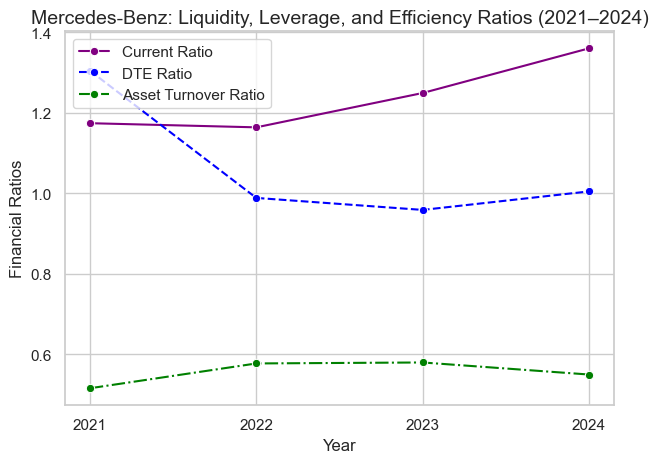

In [12]:
# Set theme for cleaner look
sns.set_theme(style='whitegrid')

# Plot each ratio directly
sns.lineplot(x=years, y=df['Current Ratio'], marker='o', label='Current Ratio', color='purple')
sns.lineplot(x=years, y=df['Debt-to-Equity Ratio'], marker='o', linestyle='--', label='DTE Ratio', color='blue')
sns.lineplot(x=years, y=df['Asset Turnover Ratio'], marker='o', linestyle='-.', label='Asset Turnover Ratio', color='green')

# Add title and labels
plt.title('Mercedes-Benz: Liquidity, Leverage, and Efficiency Ratios (2021–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Financial Ratios', fontsize=12)

# Add legend and adjust layout
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

📊 **Insights:**

- Over the period from 2021 to 2024, Mercedes-Benz showed encouraging signs of financial stability and operational efficiency. 
- The **Current Ratio** steadily climbed from **1.17 in 2022** to **1.36 in 2024**, reflecting the company’s improved ability to meet its short-term obligations. 
- At the same time, the **Debt-to-Equity Ratio** dropped sharply from **1.3 in 2021** to **0.96 in 2023**, before inching back up slightly to **1.01 in 2024**, indicating a cautious shift away from heavy reliance on debt financing.
- Meanwhile, the **Asset Turnover Ratio** hovered around **0.55**, suggesting consistent utilization of assets to generate revenue.
- These trends together narrate a story of Mercedes-Benz strengthening its balance sheet while maintaining operational effectiveness.  


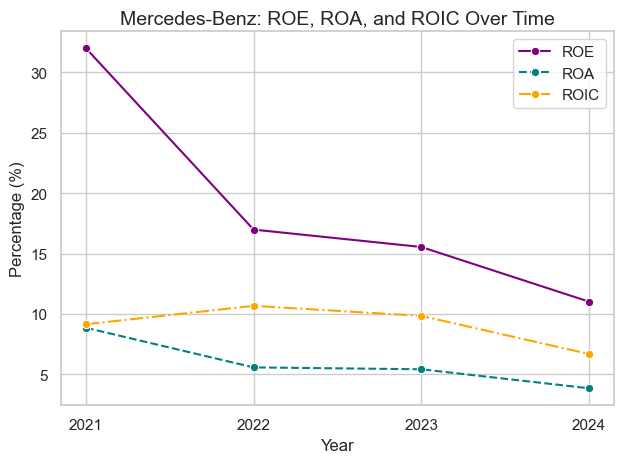

In [13]:
# Set a clean Seaborn theme for the plot
sns.set_theme(style="whitegrid")

# Plot Return on Equity (ROE)
sns.lineplot(x=years, y=df['Return on Equity (ROE)'], marker='o', label='ROE', color='purple')

# Plot Return on Assets (ROA)
sns.lineplot(x=years, y=df['Return on Assets (ROA)'], marker='o', label='ROA', color='teal', linestyle='--')

# Plot Return on Invested Capital (ROIC)
sns.lineplot(x=years, y=df['Return on Invested Capital (ROIC)'], marker='o', label='ROIC', color='orange', linestyle='-.')

# Add chart title and axis labels
plt.title('Mercedes-Benz: ROE, ROA, and ROIC Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()



📊 **Insights:**

- The return metrics for Mercedes-Benz reveal a notable contraction over 2021–2024. **Return on Equity (ROE)**, which peaked at **32% in 2021**, fell sharply to **10.9% in 2024**, signaling reduced profitability relative to shareholder investments.
- **Return on Assets (ROA)** also declined from **8.8% to 3.9%**, highlighting diminishing efficiency in utilizing total assets to generate earnings. 
- Meanwhile, **Return on Invested Capital (ROIC)** dropped from **9.3% in 2021** to **6.6% in 2024**, although it maintained a moderate level relative to the cost of capital. 
- Together, these trends suggest increasing pressure on the company’s ability to deliver high returns and emphasize the importance of optimizing capital allocation to improve shareholder value.  



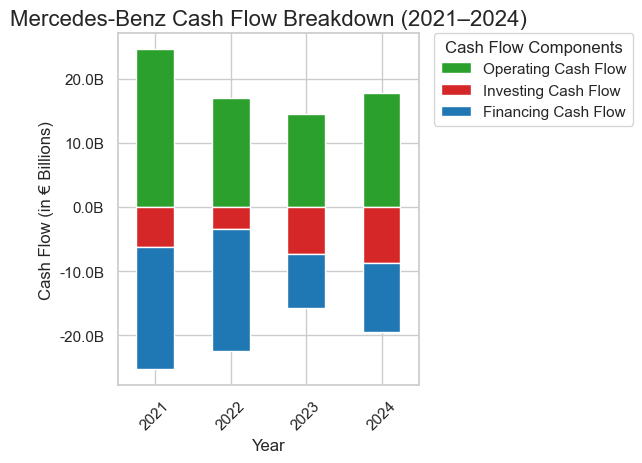

In [14]:
# Plot directly
financial_data[['Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow']].plot(
    kind='bar', stacked=True,color=['#2ca02c', '#d62728', '#1f77b4']
)

# Format x-axis to show only year
plt.xticks(ticks=range(len(financial_data.index)), labels=[pd.to_datetime(d).year for d in financial_data.index], rotation = 45)

# Format y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e-9:.1f}B'))
plt.ylabel('Cash Flow (in € Billions)')

# Add chart title and axis labels
plt.title('Mercedes-Benz Cash Flow Breakdown (2021–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.legend(title='Cash Flow Components', bbox_to_anchor=(1.05, 1),  # Position legend outside to the right
    loc='upper left',
    borderaxespad=0)

# Enable gridlines for better readability
plt.grid(True)
# Adjust layout to prevent overlapping of elements
plt.tight_layout()
# Display the final plot
plt.show()


📊 **Insights:**

- The cash flow breakdown for Mercedes-Benz from **2021 to 2024** paints a clear picture of operational strength paired with significant financing outflows. 
- **Operating Cash Flow** remained robust throughout, peaking in 2021 and slightly tapering off in subsequent years. 
- However, **Investing Cash Flow** consistently stayed negative, reflecting ongoing investments in long-term assets. 
- Notably, **Financing Cash Flow** showed substantial outflows across all years, suggesting active debt repayments or shareholder returns such as dividends and buybacks. 
- The trend highlights the company’s ability to generate cash from core operations while strategically managing capital allocation and financing activities.  

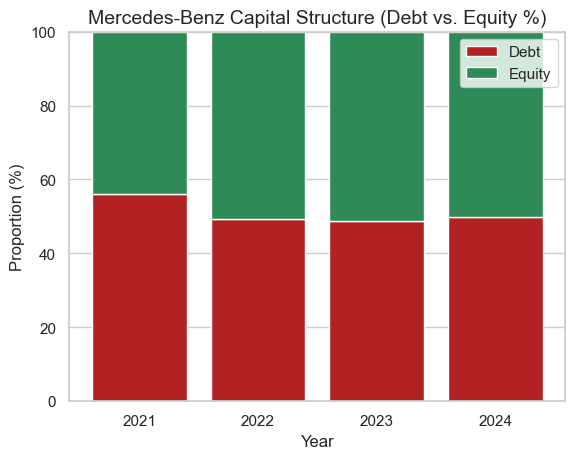

In [15]:
# Calculate the total capital structure (Debt + Equity) for each year
total = financial_data['Total Debt'] + financial_data['Total Equity Gross Minority Interest']
# Calculate Debt as a percentage of total capital
debt_pct = financial_data['Total Debt'] / total * 100
# Calculate Equity as a percentage of total capital
equity_pct = financial_data['Total Equity Gross Minority Interest'] / total * 100

# Plot the Debt percentage as the first layer of the stacked bar chart
plt.bar(years, debt_pct, label='Debt', color='firebrick')
# Plot the Equity percentage on top of Debt to create a 100% stacked effect
plt.bar(years, equity_pct, bottom=debt_pct, label='Equity', color='seagreen')

# Add a descriptive title and axis labels
plt.title('Mercedes-Benz Capital Structure (Debt vs. Equity %)', fontsize=14)
plt.ylabel('Proportion (%)')
plt.xlabel('Year')

# Add legend to differentiate Debt and Equity
plt.legend()
# Set Y-axis limits from 0% to 100%
plt.ylim(0, 100)
# Add gridlines for better readability
plt.grid(True)
# Display the chart
plt.show()


📊 **Insights:**

- The capital structure analysis reveals a **balanced mix of debt and equity** in Mercedes-Benz’s financing strategy.
- While **debt accounted for 56% in 2021**, its share declined slightly in 2022 and remained steady around **49–50%** in subsequent years.
- This shift indicates a cautious deleveraging approach, strengthening the company’s equity base over time.
- Maintaining an optimal debt-to-equity ratio positions Mercedes-Benz to manage financial risks effectively while preserving flexibility for future growth investments.  

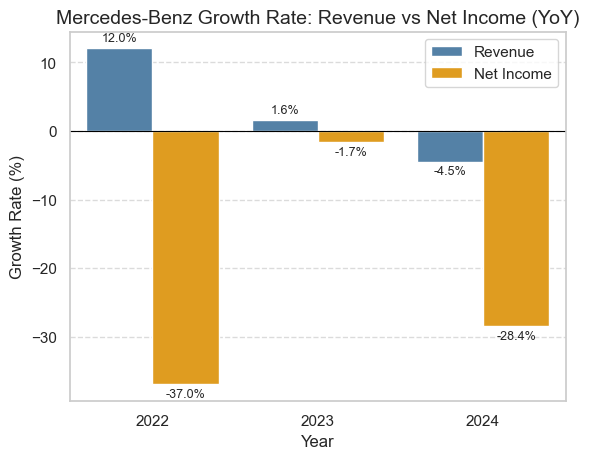

In [16]:
# Add Year column 
financial_data['Year'] = [2021, 2022, 2023, 2024]

# Calculate Growth Rates
financial_data['Revenue Growth Rate (%)'] = financial_data['Total Revenue'].pct_change() * 100
financial_data['Net Income Growth Rate (%)'] = financial_data['Net Income'].pct_change() * 100

# Drop first row with NaN
growth_data = financial_data.dropna(subset=['Revenue Growth Rate (%)'])

# Melt data for Seaborn
melted_data = growth_data.melt(id_vars='Year', 
                               value_vars=['Revenue Growth Rate (%)', 'Net Income Growth Rate (%)'],
                               var_name='Metric', value_name='Growth Rate')

# Clean metric names for display
melted_data['Metric'] = melted_data['Metric'].str.replace(' Growth Rate (%)', '')

# Plot with Seaborn
bar_plot = sns.barplot(data=melted_data, x='Year', y='Growth Rate', hue='Metric', palette=['steelblue', 'orange'])

# Add data labels on top of each bar
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

# Add labels and title
plt.title('Mercedes-Benz Growth Rate: Revenue vs Net Income (YoY)', fontsize=14)
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend(title='')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

📊 **Insights:**

- The growth trajectory for Mercedes-Benz shows **mixed trends** between 2022 and 2024.
- **Revenue growth peaked at 12% in 2022**, but momentum slowed to **1.6% in 2023** and turned slightly negative (**-4.5%**) in 2024.
- However, **Net Income growth presents a steeper decline**, plunging **-37% in 2022** and remaining negative through 2024 (**-28.4%**).
- This sharp divergence indicates that profitability challenges are more pronounced than top-line performance, pointing to higher costs or inefficiencies weighing on earnings.
- Addressing these issues could help realign revenue growth with improved bottom-line results.  
